In [169]:
import requests
import os
import datetime
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact
%matplotlib inline

In [170]:
zip_list=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040 ,11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [171]:
bronx=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473]

brooklyn=[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]

manhattan=[ 10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040]

queens=[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378]

staten_island=[ 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [172]:
sale_path=Path("data/Sale_Prices_Zip_2015.csv")
sale_df=pd.read_csv(sale_path)
sale_ny_df=sale_df[sale_df['StateName'] == "New York"]

#sale_ny_df.fillna(0,inplace=True)

sale_ny_df.reset_index(inplace=True)        
sale_ny_df.drop(columns=['RegionID','index','SizeRank','StateName'],inplace=True)
sale_ny_df.rename(columns={"RegionName": "Zip_Code"},inplace=True) 

for index, row in sale_ny_df.iterrows():
    if not row[0] in zip_list:
        sale_ny_df=sale_ny_df.drop(index)

sale_ny_df.reset_index(inplace=True)        
sale_ny_df.drop(columns=['index'],inplace=True)

sale_ny_df['Borough']=pd.Series()
column_names=list(sale_ny_df.columns.values)
sale_ny_df=sale_ny_df[['Zip_Code','Borough',  '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03']]

for i in range(len(sale_ny_df)):
    if sale_ny_df.iloc[i,0] in bronx:
        sale_ny_df.iloc[i,1]='Bronx'
    elif sale_ny_df.iloc[i,0] in brooklyn:
        sale_ny_df.iloc[i,1]='Brooklyn'
    elif sale_ny_df.iloc[i,0] in manhattan:
        sale_ny_df.iloc[i,1]='Manhattan'
    elif sale_ny_df.iloc[i,0] in queens:
         sale_ny_df.iloc[i,1]='Queens'
    elif sale_ny_df.iloc[i,0] in staten_island:
         sale_ny_df.iloc[i,1]='Staten Island'
    
        
sale_ny_df.head()


C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Zip_Code,Borough,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,10025,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024100.0,1029800.0,835100.0,961500.0,892000.0,869800.0,854700.0,870500.0,920100.0,1007900.0
1,10023,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1229500.0,1141900.0,1146900.0,1052200.0,1020200.0,1051000.0,1151400.0,1060300.0,1148400.0,1107500.0
2,10002,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,944000.0,954800.0,875000.0,895200.0,851300.0,784800.0,727100.0,818300.0,820600.0,898900.0
3,10016,Manhattan,905000.0,921100.0,822100.0,874900.0,888700.0,880100.0,852000.0,830800.0,...,1020500.0,931200.0,819700.0,787500.0,817100.0,773500.0,771300.0,776800.0,742200.0,733600.0
4,10011,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1100600.0,1169000.0,1086700.0,1151900.0,1019400.0,1073400.0,1057500.0,1188200.0,1265500.0,1257900.0


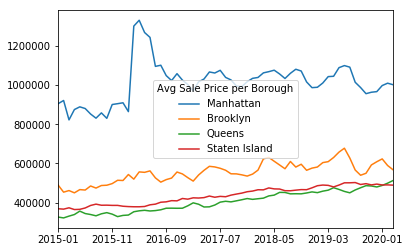

In [173]:
avg_sale_price_per_borough=sale_ny_df.drop(columns='Zip_Code')
avg_sale_price_per_borough.set_index(avg_sale_price_per_borough['Borough'],inplace=True)
avg_sale_price_per_borough.drop(columns='Borough',inplace=True)
avg_sale_price_per_borough=avg_sale_price_per_borough.groupby('Borough').mean()
ax=avg_sale_price_per_borough.loc['Manhattan'].plot()
avg_sale_price_per_borough.loc['Brooklyn'].plot(ax=ax)
avg_sale_price_per_borough.loc['Queens'].plot(ax=ax)
avg_sale_price_per_borough.loc['Staten Island'].plot(ax=ax)
ax.legend(['Manhattan','Brooklyn','Queens','Staten Island'],title='Avg Sale Price per Borough')

In [174]:
avg_sale_price_per_borough=sale_ny_df.drop(columns='Zip_Code').groupby(['Borough']).mean()
def plot_avg_sale_price_per_borough (borough):
    return(avg_sale_price_per_borough.loc[borough].hvplot.line( rot=90,
                                                               label=f'Avg Sale Price In {borough}',
                                                               xlabel='Date',
                                                               ylabel="Price"
    ))
list_of_boroughs=['Manhattan','Brooklyn','Queens','Staten Island']
interact(plot_avg_sale_price_per_borough,borough=list_of_boroughs)

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(Curve, name='interactive309300')

In [160]:
avg_sale_price_per_zip_code=sale_ny_df.drop(columns='Borough')
avg_sale_price_per_zip_code.set_index(avg_sale_price_per_zip_code['Zip_Code'],inplace=True)
avg_sale_price_per_zip_code.drop(columns='Zip_Code',inplace=True)
avg_sale_price_per_zip_code=avg_sale_price_per_zip_code.transpose()
avg_sale_price_per_zip_code.mean().hvplot.bar(rot=90,label='Avg Sale Price per Zip Code Over 5 Years',ylabel='Price',xlabel='Zip Code')

:Bars   [Zip_Code]   (0)

In [175]:
def plot_sale_price_per_borough(borough):
    borough_sale_df=sale_ny_df[sale_ny_df['Borough']==borough]
    borough_sale_df.set_index(borough_sale_df['Zip_Code'],inplace=True)
    borough_sale_df.drop(columns=['Zip_Code','Borough'],inplace=True)
    borough_sale_df=borough_sale_df.transpose()
    return(borough_sale_df.hvplot.line(label=f'Sale Price per Zip Code in {borough}',rot=90,ylabel='Price',xlabel='Date',figsize=(20,20)))
list_of_boroughs=['Manhattan','Brooklyn','Queens','Staten Island']
interact(plot_sale_price_per_borough,borough=list_of_boroughs)

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(NdOverlay, name='interactive310939')

In [168]:
df_monte_carlo=sale_ny_df.drop(columns='Borough')
df_monte_carlo.set_index(df_monte_carlo['Zip_Code'],inplace=True)
df_monte_carlo.drop(columns=['Zip_Code'],inplace=True)
df_monte_carlo=df_monte_carlo.transpose()
df_monte_carlo.head()

Zip_Code,10025,10023,10002,10016,10011,10003,10024,11238,10314,11236,...,11413,10309,11412,11433,10308,10310,10303,11429,10302,11436
2015-01,NaN,NaN,NaN,905000.0,NaN,NaN,NaN,825200.0,NaN,322800.0,...,NaN,448600.0,346000.0,337700.0,374200.0,393800.0,246900.0,382600.0,NaN,238000.0
2015-02,NaN,NaN,NaN,921100.0,NaN,NaN,NaN,772300.0,NaN,297300.0,...,NaN,441500.0,336700.0,315000.0,357300.0,398200.0,227000.0,369200.0,NaN,281200.0
2015-03,NaN,NaN,NaN,822100.0,NaN,NaN,NaN,756000.0,NaN,323200.0,...,NaN,452300.0,330100.0,332200.0,358800.0,419700.0,219700.0,360400.0,NaN,305300.0
2015-04,NaN,NaN,NaN,874900.0,NaN,NaN,NaN,720600.0,NaN,315200.0,...,NaN,417400.0,338900.0,344700.0,378600.0,374200.0,222200.0,369100.0,NaN,315000.0
2015-05,NaN,NaN,NaN,888700.0,NaN,NaN,NaN,739000.0,NaN,334800.0,...,NaN,417100.0,355200.0,367600.0,394700.0,351800.0,228200.0,376400.0,NaN,324300.0
